In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import joblib
# import reverse-geocode

In [2]:
processed_df = pd.read_csv("my_processed_df.csv")
processed_df["eventTimeStart"] = pd.to_datetime(processed_df.eventTimeStart, format="%Y-%m-%dT%H:%M:%S")
processed_df.tail()

,eventTimeStart,latStart,lonStart,latEnd,lonEnd
5554,2016-02-29 21:50:19,40.725563,-73.951843,40.643845,-73.783241
5555,2016-02-29 22:31:02,40.766590,-73.921333,40.643845,-73.783241
5556,2016-02-29 22:52:22,40.806976,-73.950020,40.643845,-73.783241
5557,2016-02-29 23:39:56,40.721992,-73.957787,40.643845,-73.783241
5558,2016-02-29 23:15:47,40.705406,-73.950012,40.643845,-73.783241


In [3]:
processed_df["week"] = processed_df.eventTimeStart.dt.week
processed_df["dayofweek"] = processed_df.eventTimeStart.dt.dayofweek
processed_df["hours"] = processed_df.eventTimeStart.dt.hour

In [4]:
from sklearn.cluster import KMeans

In [5]:
X_processed_df = processed_df[['latStart', 'lonStart', 'week', 'dayofweek', 'hours']]
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X_processed_df)
    inertia.append(algorithm.inertia_)

/home/artig/miniconda3/envs/mlflow/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:1032: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'full' instead.
  "cluster. Using 'full' instead.", RuntimeWarning)


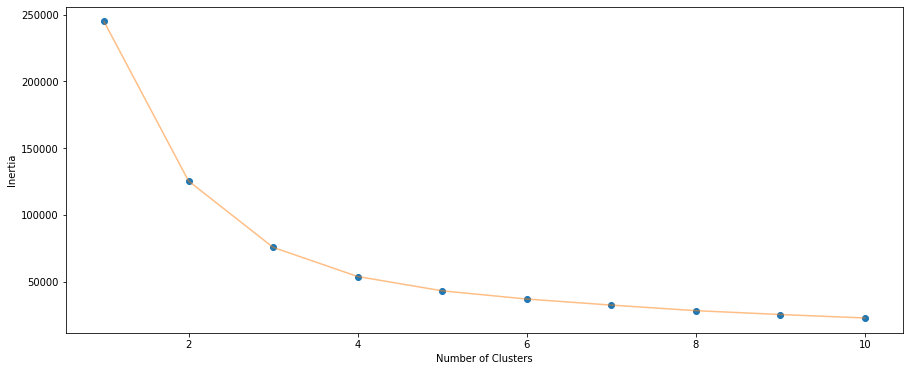

In [6]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 5,init='k-means++', n_init = 10 ,max_iter=300, 
                    tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X_processed_df)
joblib.dump(algorithm, 'k-means_cluster.pkl') 

In [ ]:
processed_df["cluster"] = algorithm.predict(X_processed_df)

In [ ]:
processed_df.drop(["eventTimeStart"], axis=1,inplace=False)

In [ ]:
processed_df.to_csv("my_featured_data.csv", index=False)

### Geolocator

In [9]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="track&go")

In [11]:
def GetCorrFromAdress(address):
    location = geolocator.geocode(address)
    return (location.latitude, location.longitude)

def GetAddFromCorr(corr):
    location = geolocator.reverse(corr)
    return location.address

In [8]:
processed_df.loc[656,:]

eventTimeStart    2016-02-04 16:15:09
latStart                      40.8093
lonStart                     -73.9518
latEnd                        40.7181
lonEnd                       -73.9855
week                                5
dayofweek                           3
hours                              16
Name: 656, dtype: object

In [13]:
GetAddFromCorr((40.8093, -73.9518))

'Aloft Hotel, 2296, Frederick Douglass Boulevard, Harlem, Manhattan Community Board 10, Manhattan, New York County, New York, 10039, United States'